<a href="https://colab.research.google.com/github/Sweta-Das/CODSOFT/blob/main/codsoft_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
car_df = pd.read_csv('drive/MyDrive/Colab Notebooks/CODSOFT/car_purchasing.csv', encoding='ISO-8859-1')
adv_df = pd.read_csv('drive/MyDrive/Colab Notebooks/CODSOFT/advertising.csv')

In [5]:
car_df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
adv_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [8]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
car_df.nunique()

customer name          498
customer e-mail        500
country                211
gender                   2
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

In [10]:
car_df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [11]:
adv_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
car_df.duplicated().sum()

0

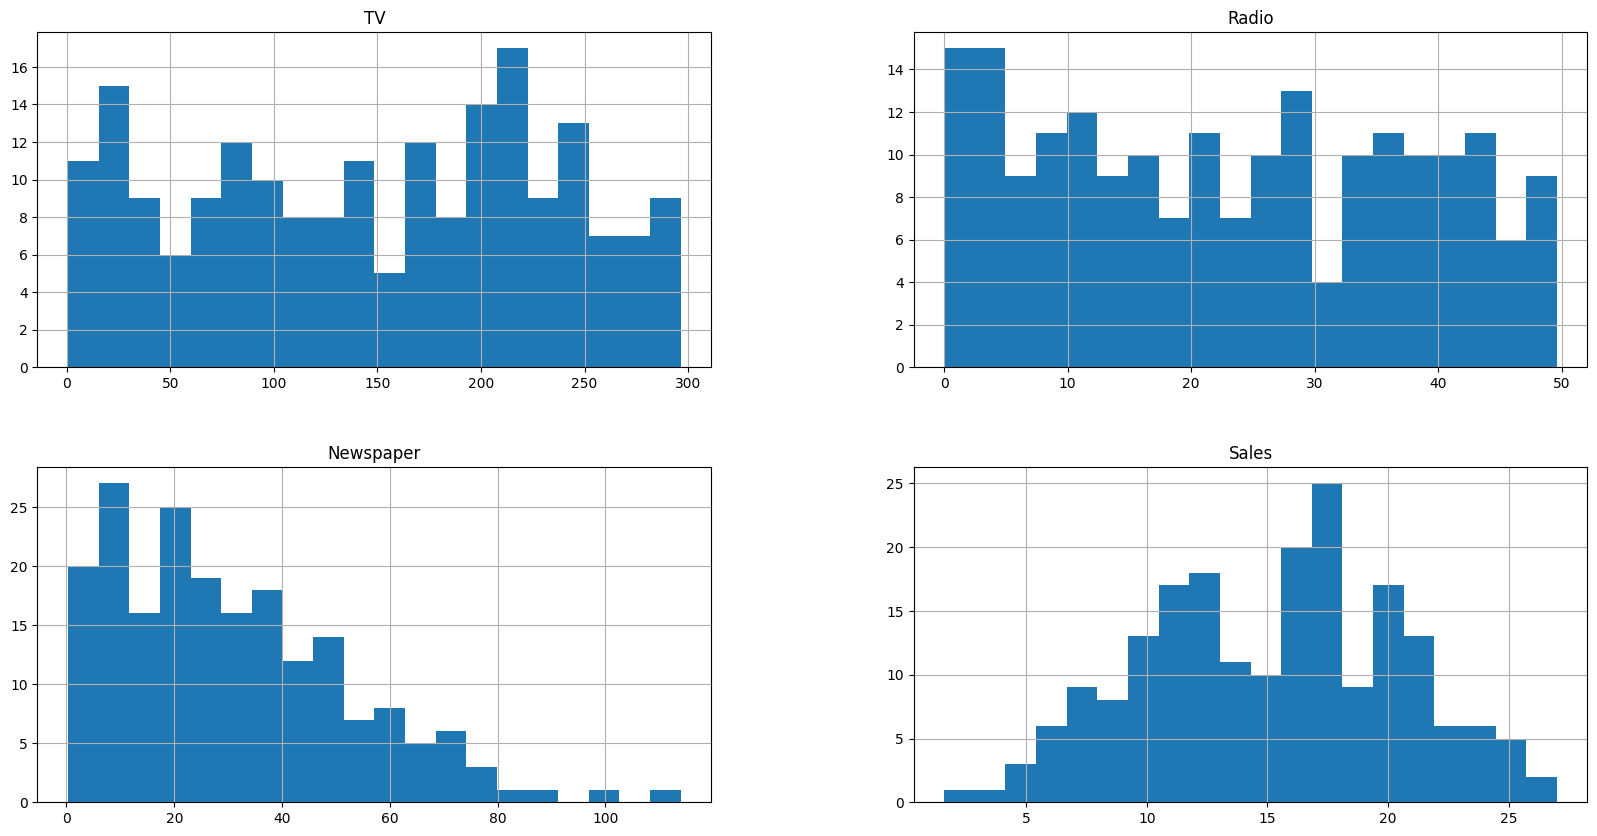

In [17]:
import matplotlib.pyplot as plt

adv_df.hist(bins=20, figsize= (20, 10))
plt.show()

These graphs show that TV and radio are continuously used for ads but, newspaper is only used at the initial phase of ad of car while reduced afterwise.

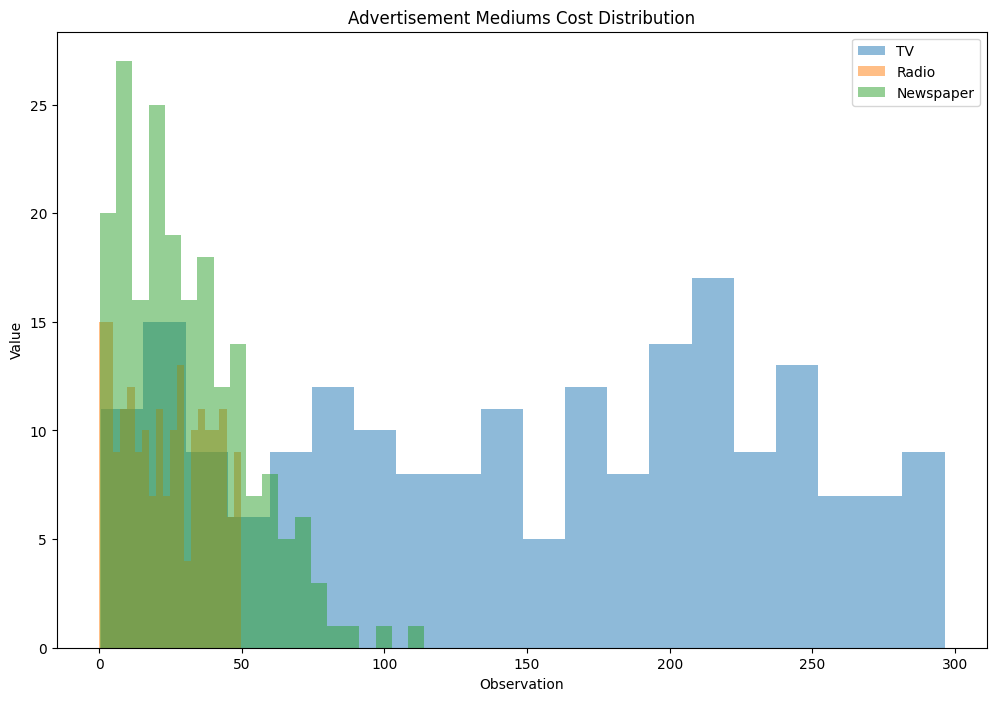

In [41]:
plt.figure(figsize=(12,8))

for medium in ['TV', 'Radio', 'Newspaper']:
  plt.hist(adv_df[medium], bins = 20, alpha = 0.5, label = medium)

plt.title('Advertisement Mediums Cost Distribution')
plt.xlabel('Observation')
plt.ylabel('Value')
plt.legend()
plt.show()

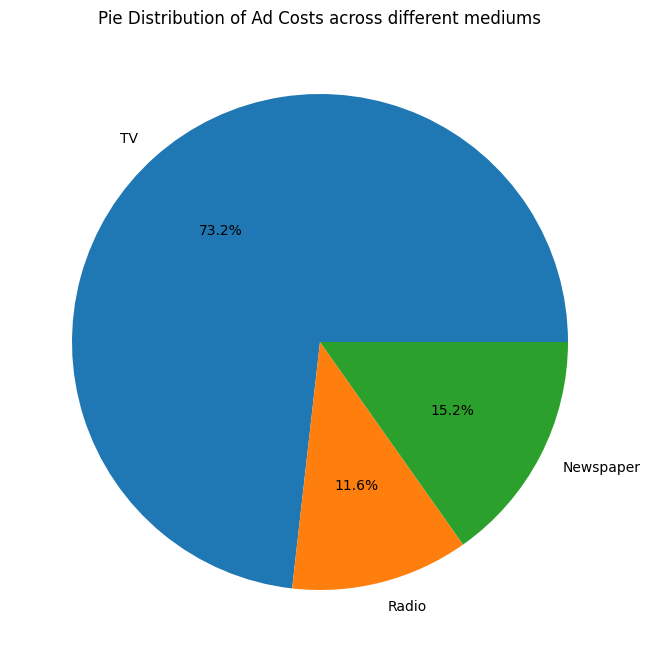

In [47]:
total_costs = adv_df[['TV', 'Radio', 'Newspaper']].sum()

plt.figure(figsize = (8, 10))
plt.pie(total_costs, labels = total_costs.index, autopct = '%1.1f%%')
plt.title('Pie Distribution of Ad Costs across different mediums')
plt.show()

For advertisement platform selection, TV seems the obvious choice as its value remains consistent.

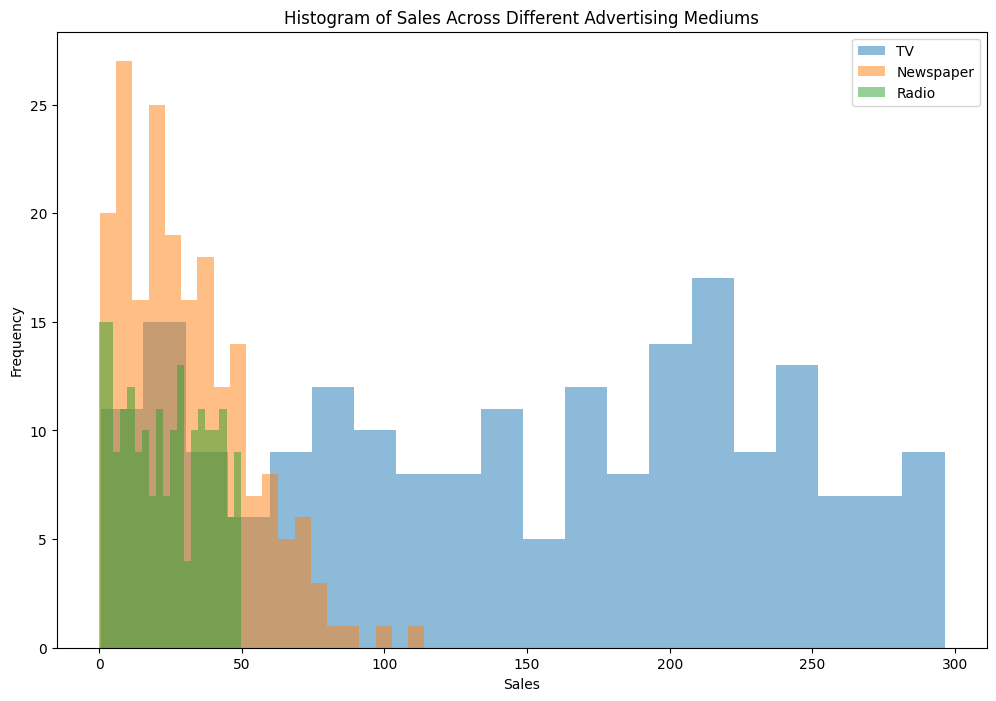

In [44]:
plt.figure(figsize=(12, 8))

# Histogram for sales across different advertising mediums
for medium in ['TV', 'Newspaper', 'Radio']:
    plt.hist(adv_df[medium], bins=20, alpha=0.5, label=medium)

plt.title('Histogram of Sales Across Different Advertising Mediums')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()

On the basis of advertising expense as well, TV though expensive remains consistent and sales are regular on TV while newspaper and radio are cheap, their sales decreases w.r.t time.

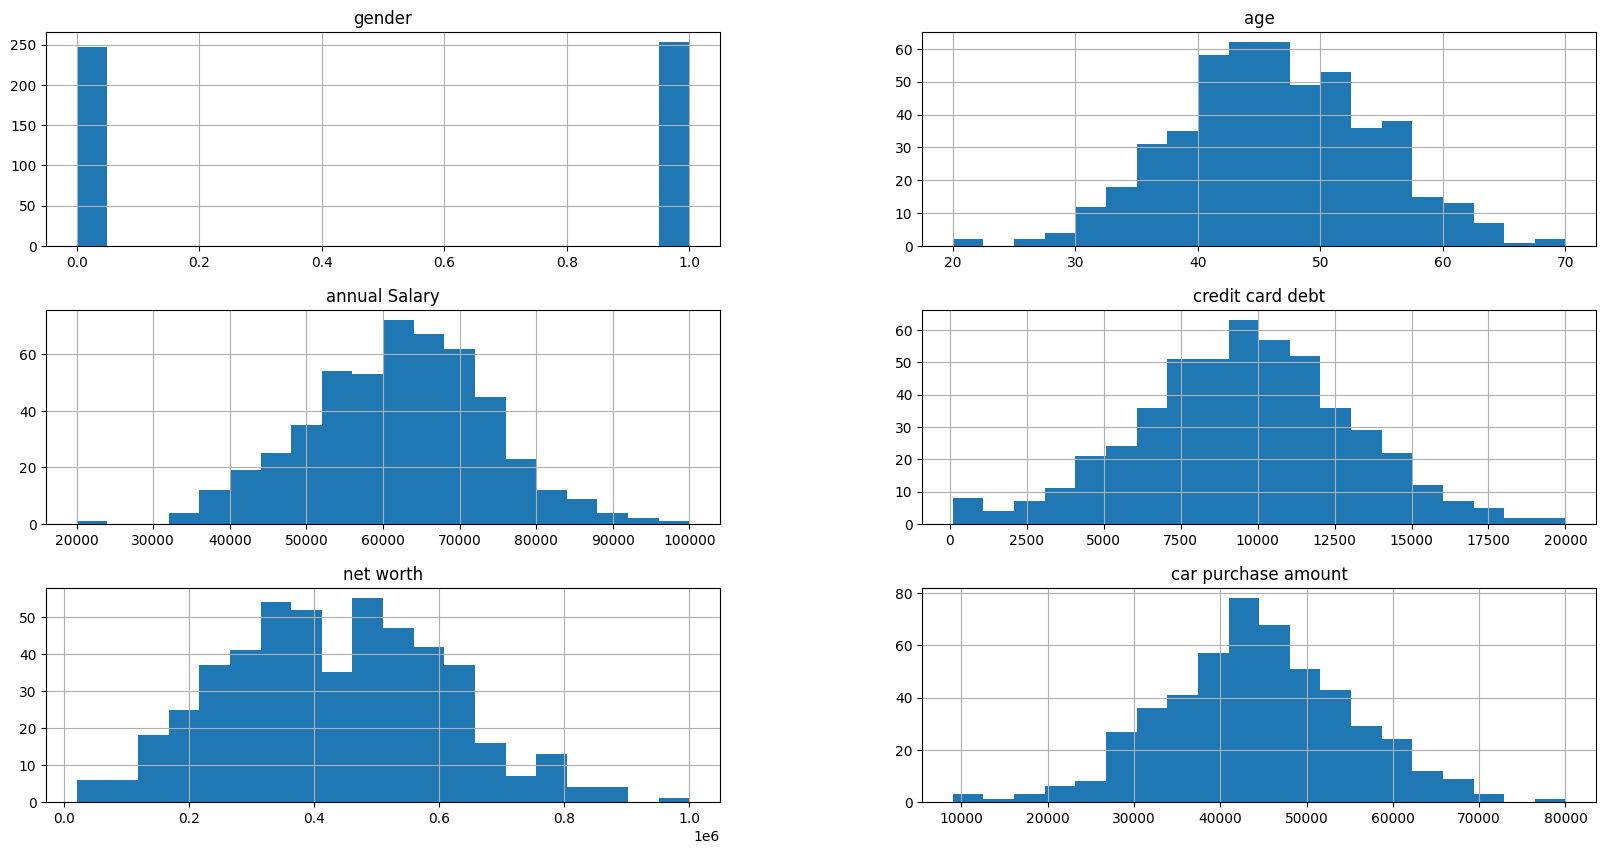

In [48]:
import matplotlib.pyplot as plt

car_df.hist(bins=20, figsize= (20, 10))
plt.show()

Based on the customer dataset, mostly the customers belong to the age group of 40-50, most of their annual salary is between USD52000-75000, their credit card debt ranges mostly from UsD 7000-12000, and the car price ranges from USD 38000-50000.